## 1. Data Preparation & EDA

In [2]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read the data
housing = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#checking shape of dataset
housing.shape

(1460, 81)

In [5]:
#checking info of dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
import pandas_profiling
#profile_report = pandas_profiling.ProfileReport(housing)
#profile_report

In [7]:
numeric_data = housing.select_dtypes(include = ['float64','int64'])
numeric_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [8]:
#checking percentage of null values in each column

df_missing=pd.DataFrame((round(100*(housing.isnull().sum()/len(housing.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

,missing
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55
GarageFinish,5.55


In [9]:
#reading data dictionary

f = open("/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt", "r")
print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [10]:
#addressing NaN values based on data dictionary

# In column 'PoolQC' (Pool quality), NaN stands for No Pool
housing['PoolQC'] = housing['PoolQC'].fillna('No_Pool')

# In column 'MiscFeature' (Miscellaneous Features), NaN stands for None, meaning the house has no miscellaneous features.
housing['MiscFeature'] = housing['MiscFeature'].fillna('None')

# In column 'Alley', NaN stands for No Alley Access as per the data dictionary
housing['Alley'] = housing['Alley'].fillna('No_Alley_Access')

# In column 'Fence' (Fence Quality), NaN stands for No Fence as per the data dictionary
housing['Fence'] = housing['Fence'].fillna('No_Fence')

# In column 'FireplaceQu' (FireplaceQu Quality), NaN stands for No Fireplace as per the data dictionary
housing['FireplaceQu'] = housing['FireplaceQu'].fillna('No_Fireplace')

# LotFrontage stands for Linear feet of street connected to property, there is no explanation to impute this in data dictionary
# Let's consider imputing it with median of the lotFrontage of houses in the same neighbourhood

# Group data by neighborhood and impute missing value with median LotFrontage of all the neighborhood
housing["LotFrontage"] = housing.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

# In column 'GarageYrBlt' (Gargae Year Built), NaN stands for houses with no garage, let's impute with 0
housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna(0)

# 'GarageType', 'GarageFinish', 'GarageQual' (Garage Quality) and 'GarageCond'(Garage Condition)
# Missing values signify no garage as per data dictionary.let's impute NaN values here with No Garage
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    housing[col] = housing[col].fillna('No_Garage')

#BsmtFinType1, BsmtFinType2 (Rating of basement finished area),
#BsmtExposure (Basement Exposure), BsmtQual(Basement Quality), BsmtCond (Basement Conidtion)
#These are all parameter related to basement. A NaN value probably signifies that the house does not have a basement.
for col in ('BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond'):
    housing[col] = housing[col].fillna('No_Basement')
    
# In column 'MasVnrType' (Masonry veneer type), let's impute it with mode "None"
housing['MasVnrType'] = housing['MasVnrType'].fillna('None')

# In column 'MasVnrType' (Masonry veneer type), let's impute it with mode 0 corresponding to None
housing['MasVnrArea'] = housing['MasVnrArea'].fillna(0)

# In column 'Electrical' (Electrical system), let's impute NaN with "Other"
housing['Electrical'] = housing['Electrical'].fillna("Other")

In [11]:
#checking percentage of null values in each column

df_missing=pd.DataFrame((round(100*(housing.isnull().sum()/len(housing.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

,missing
Id,0.0
CentralAir,0.0
GarageYrBlt,0.0
GarageType,0.0
FireplaceQu,0.0
Fireplaces,0.0
Functional,0.0
TotRmsAbvGrd,0.0
KitchenQual,0.0
KitchenAbvGr,0.0


We do not have any more null values

## 2. EDA and Data Preparation

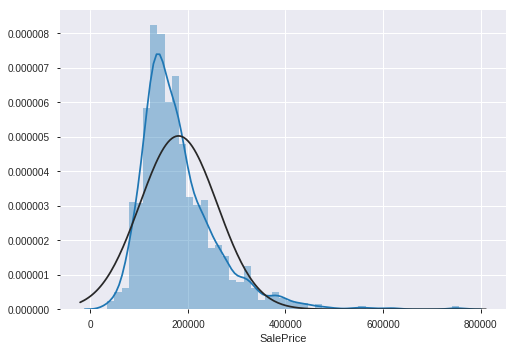

In [12]:
# Let us first visualize the spread of Target Variable 'Sale Price'
from scipy.stats import norm
sns.distplot(housing['SalePrice'], fit=norm)
plt.show()

The Sale Price distribution is not normally distributed, it is a little positively skewed with some houses having really high Sale Price

In [13]:
## "MSSubClass" is a numeric column but it should actually be categorical as per the data dictionary, so let's convert that.

housing=housing.replace({'MSSubClass' : { 20 : '1-STORY 1946 & NEWER ALL STYLES', 
                                          30:'1-STORY 1945 & OLDER',
                                          40:'1-STORY W/FINISHED ATTIC ALL AGES',
                                          45:'1-1/2 STORY - UNFINISHED ALL AGES',
                                          50:'1-1/2 STORY FINISHED ALL AGES',
                                          60:'2-STORY 1946 & NEWER',
                                          70:'2-STORY 1945 & OLDER',
                                          75:'2-1/2 STORY ALL AGES',
                                          80:'SPLIT OR MULTI-LEVEL',
                                          85:'SPLIT FOYER',
                                          90:'DUPLEX - ALL STYLES AND AGES',
                                         120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
                                         150:'1-1/2 STORY PUD - ALL AGES',
                                         160:'2-STORY PUD - 1946 & NEWER',
                                         180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
                                         190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'}})

In [14]:
numeric_data = housing.select_dtypes(include = ['float64','int64'])
numeric_data.columns

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

"ID" column is like row number, it has all unique values and can be ignored for analysis.

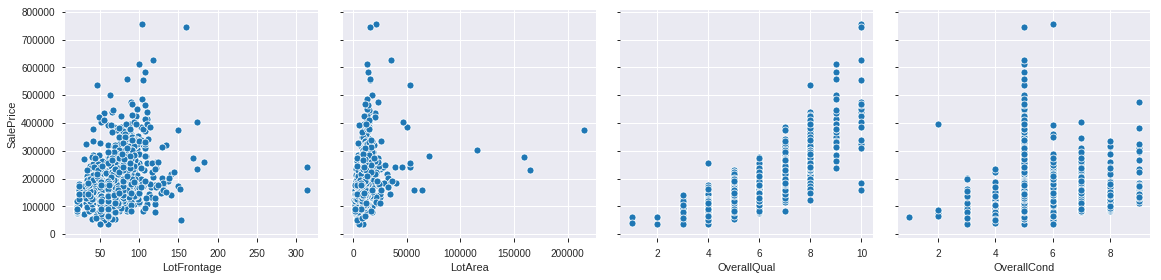

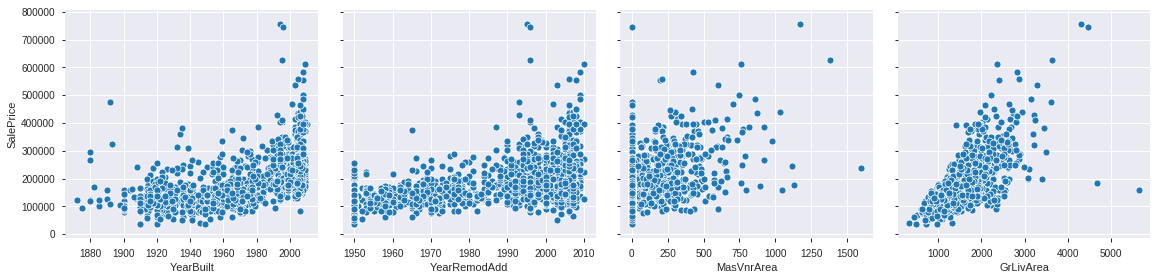

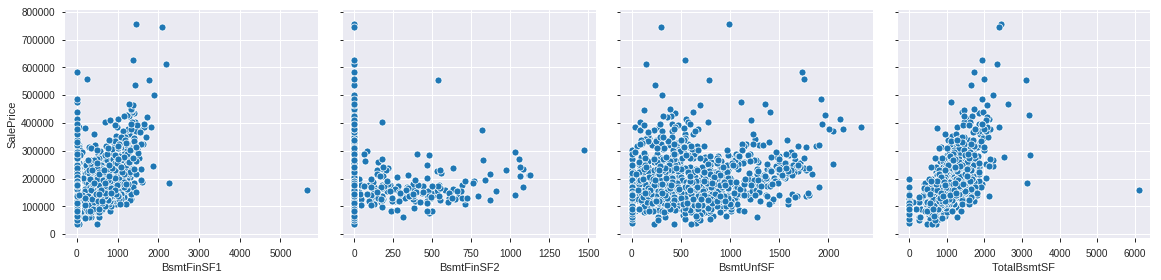

In [15]:
#function to plot scatter plot numeric variables with price

def pp(w,x,y,z):
    sns.pairplot(housing, x_vars=[w,x,y,z], y_vars='SalePrice',height=4, aspect=1, kind='scatter')
    plt.show()

pp('LotFrontage', 'LotArea', 'OverallQual','OverallCond')
pp('YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'GrLivArea')
pp('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF')

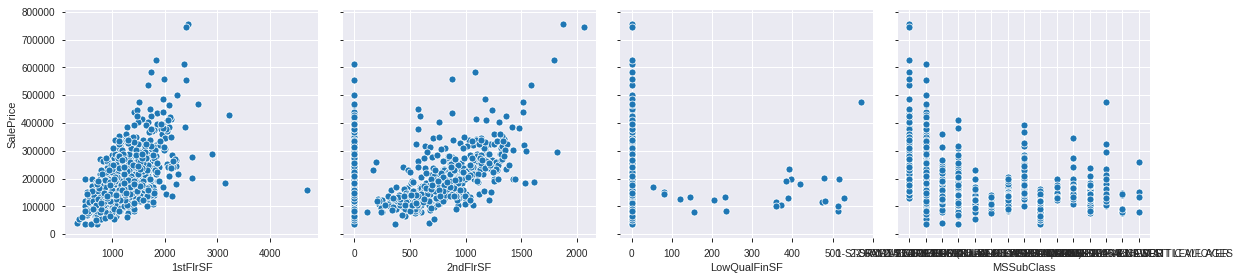

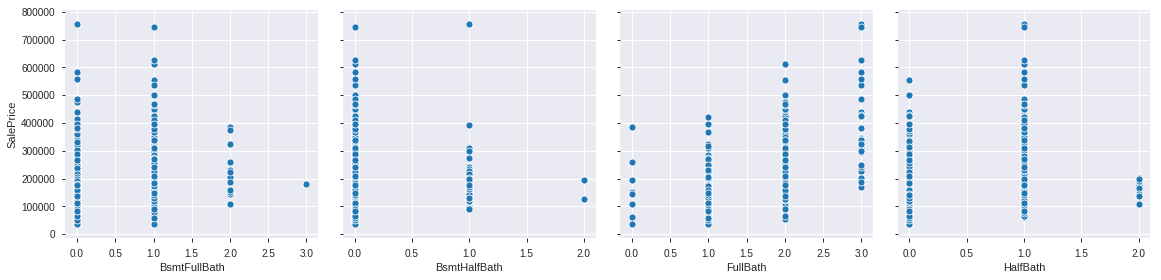

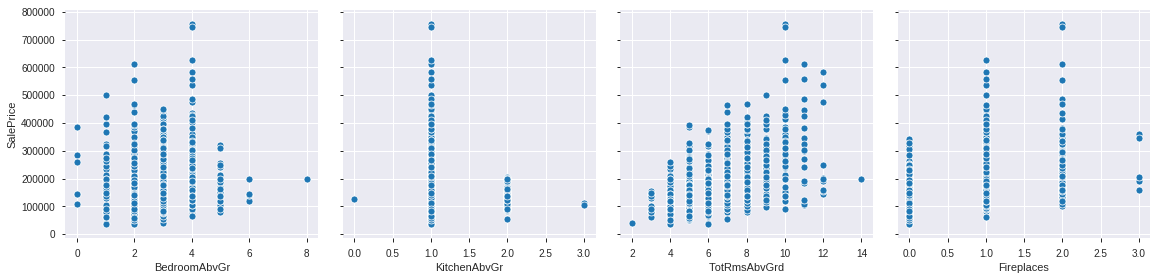

In [16]:
#function to plot scatter plot numeric variables with price

def pp(w,x,y,z):
    sns.pairplot(housing, x_vars=[w,x,y,z], y_vars='SalePrice',height=4, aspect=1, kind='scatter')
    plt.show()

pp('1stFlrSF', '2ndFlrSF','LowQualFinSF','MSSubClass')
pp('BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath')
pp('BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces')

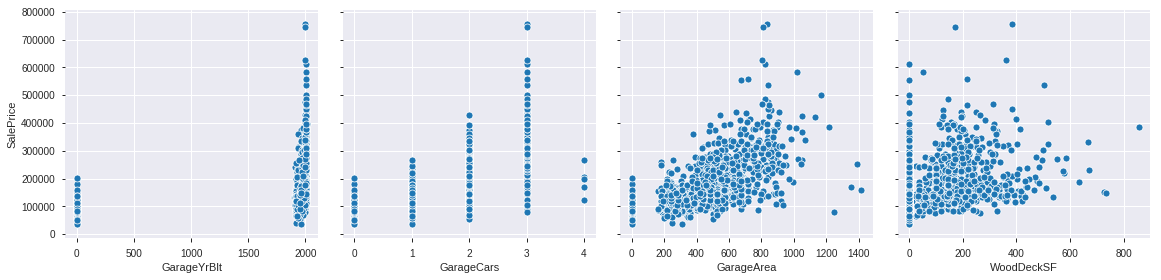

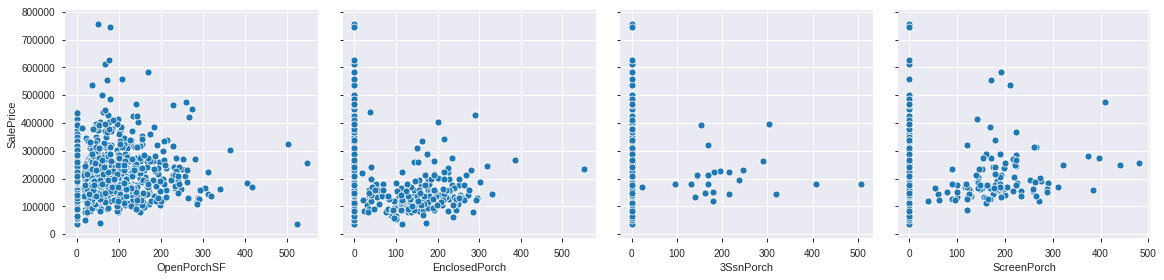

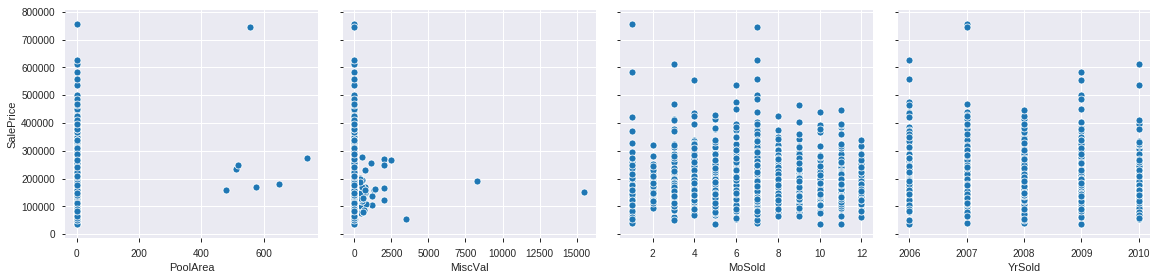

In [17]:
#function to plot scatter plot numeric variables with price

def pp(w,x,y,z):
    sns.pairplot(housing, x_vars=[w,x,y,z], y_vars='SalePrice',height=4, aspect=1, kind='scatter')
    plt.show()

pp('GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF')
pp('OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch')
pp('PoolArea','MiscVal', 'MoSold', 'YrSold')

In [18]:
# label encode ordinal features where there is order in categories

housing = housing.replace({  "Alley":        {"No_Alley_Access" : 0, "Grvl" : 1, "Pave" : 2},
                       "BsmtCond":     {"No_Basement" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "BsmtExposure": {"No_Basement" : 0, "No" : 2, "Mn" : 2, "Av": 3, 
                                        "Gd" : 4},
                       "BsmtFinType1": {"No_Basement" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, 
                                        "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2": {"No_Basement" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, 
                                        "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual":     {"No_Basement" : 0, "Po" : 1, "Fa" : 2, "TA": 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "CentralAir":   {"None" : 0, "N" : 1, "Y" : 2},
                       "ExterCond":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, 
                                        "Gd": 4, "Ex" : 5},
                       "ExterQual":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, 
                                        "Gd": 4, "Ex" : 5},
                       "Fence":        {"No_Fence" : 0, "MnWw" : 1, "GdWo" : 2, "MnPrv": 3, 
                                        "GdPrv" : 4},
                       "FireplaceQu":  {"No_Fireplace" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "Functional":   {"None" : 0, "Sal" : 1, "Sev" : 2, "Maj2" : 3, 
                                        "Maj1" : 4, "Mod": 5, "Min2" : 6, "Min1" : 7, 
                                        "Typ" : 8},
                       "GarageCond":   {"No_Garage" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "GarageQual":   {"No_Garage" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "GarageFinish": {"No_Garage" : 0, "Unf" : 1, "RFn" : 2, "Fin" : 3},
                       "HeatingQC":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "KitchenQual":  {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "LandContour":  {"None" : 0, "Low" : 1, "HLS" : 2, "Bnk" : 3, 
                                        "Lvl" : 4},
                       "LandSlope":    {"None" : 0, "Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape":     {"None" : 0, "IR3" : 1, "IR2" : 2, "IR1" : 3, 
                                        "Reg" : 4},
                       "PavedDrive":   {"None" : 0, "N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC":       {"No_Pool" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, 
                                        "Ex" : 4},
                       "Street":       {"None" : 0, "Grvl" : 1, "Pave" : 2},
                       "Utilities":    {"None" : 0, "ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, 
                                        "AllPub" : 4}}
                     )

housing.BsmtCond = housing.BsmtCond.astype(int)

In [19]:
## FUNCTION TO PLOT CHARTS

def plot_charts(var1,var2,label_rotation):
    plt.figure(figsize=(12, 10))   
    plt.subplot(2,2,1)
    plt.title('Count Plot of '+ var1)
    plt1=sns.countplot(housing[var1], palette=("husl"))
    plt1.set(xlabel = '%s'%var1, ylabel='Count of'+ '%s'%var1)
    if(label_rotation):
        plt1.set_xticklabels(plt1.get_xticklabels(),rotation=90)
        
    plt.subplot(2,2,2)
    plt.title(var1+' vs Price')
    plt2=sns.boxplot(x=housing[var1], y=housing.SalePrice, palette=("husl"))
    if(label_rotation):
        plt2.set_xticklabels(plt2.get_xticklabels(),rotation=90)
    
    plt.subplot(2,2,3)
    plt.title('Count Plot of '+ var2)
    plt3=sns.countplot(housing[var2], palette=("husl"))
    plt3.set(xlabel = '%s'%var2, ylabel='Count of'+ '%s'%var2)
    if(label_rotation):
        plt3.set_xticklabels(plt3.get_xticklabels(),rotation=90)
    
    plt.subplot(2,2,4)
    plt.title(var2+' vs Price')
    plt4=sns.boxplot(x=housing[var2], y=housing.SalePrice, palette=("husl"))
    if(label_rotation):
        plt4.set_xticklabels(plt4.get_xticklabels(),rotation=90)
        
    plt.show()

In [20]:
categorical_features=housing.select_dtypes(include='object')
categorical_features.columns

Index(['MSSubClass', 'MSZoning', 'LotConfig', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
       'Electrical', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

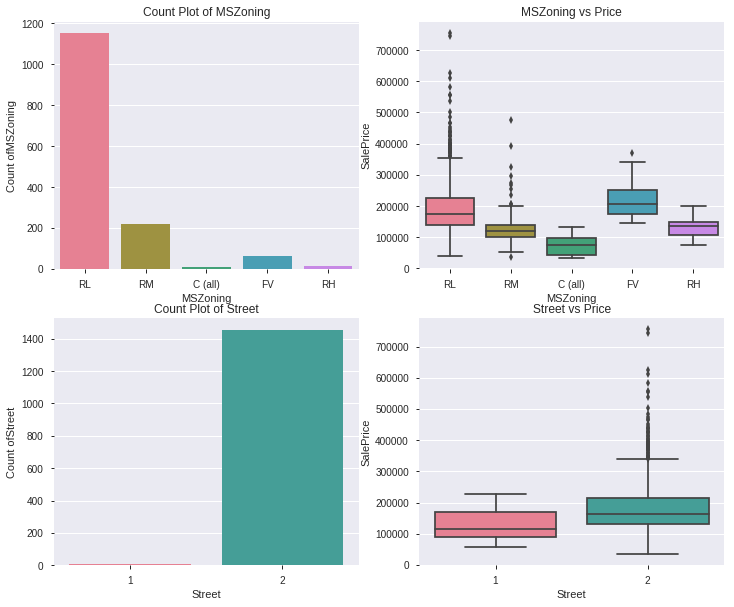

In [21]:
plot_charts('MSZoning', 'Street', label_rotation=False)

**Observation:** 
- MsZoning identifies the general zoning classification of the sale. 
- We see that the prices vary a lot for different values and most of the records are for "RL" Residential Low Density properties.
- Street identifies the Type of road access to property
- While we see that houses with Paved roads have higher Sale Price compared to Gravel, we must also note that this is a highly imbalanced variable with most records as "Pave"

In [22]:
housing['Street'].value_counts(dropna=False)

2    1454
1       6
Name: Street, dtype: int64

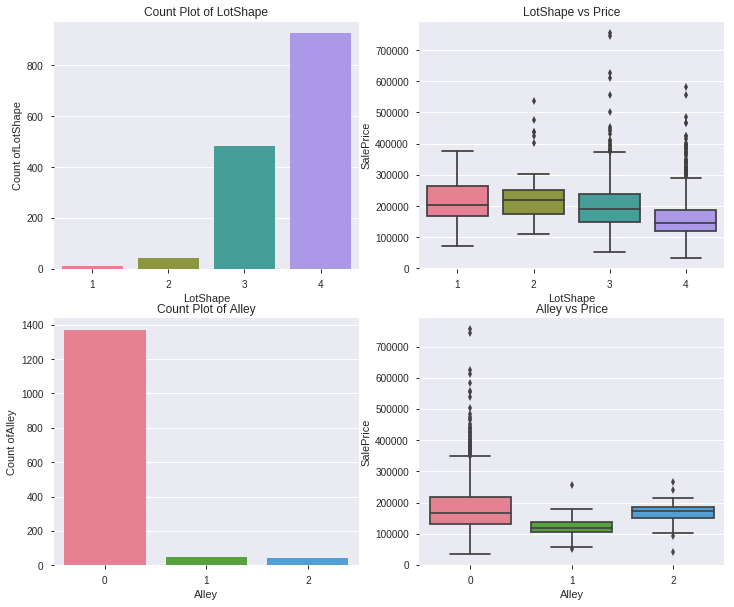

In [23]:
plot_charts('LotShape','Alley',label_rotation=False)

In [24]:
housing['Street'].value_counts(dropna=False)

2    1454
1       6
Name: Street, dtype: int64

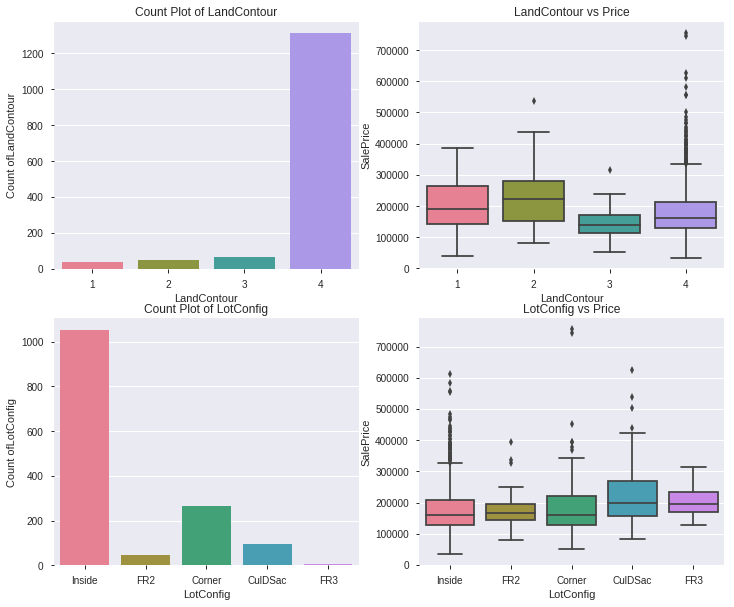

In [25]:
plot_charts('LandContour','LotConfig',label_rotation=False)

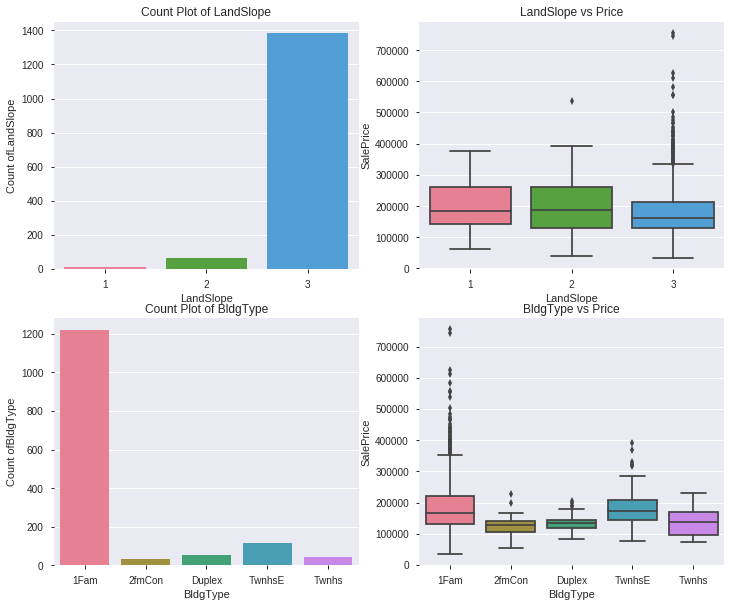

In [26]:
plot_charts('LandSlope','BldgType',label_rotation=False)

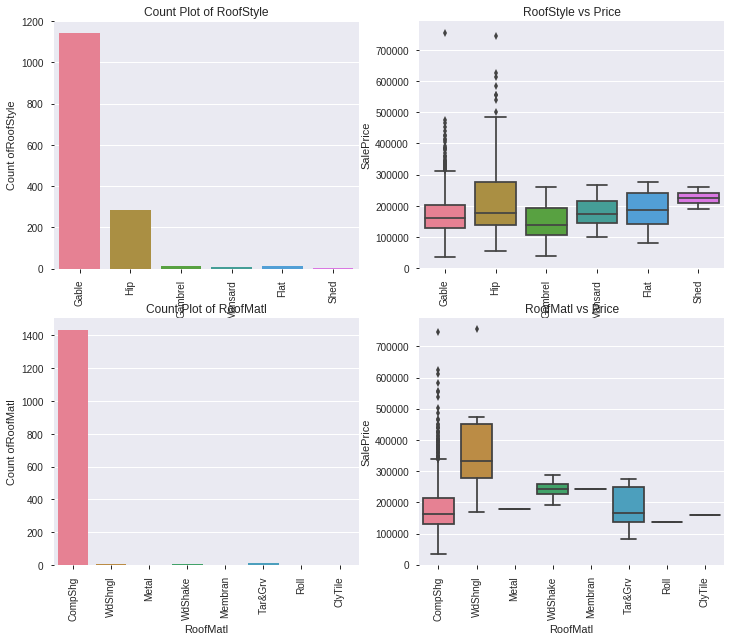

In [27]:
plot_charts('RoofStyle', 'RoofMatl',label_rotation=True)

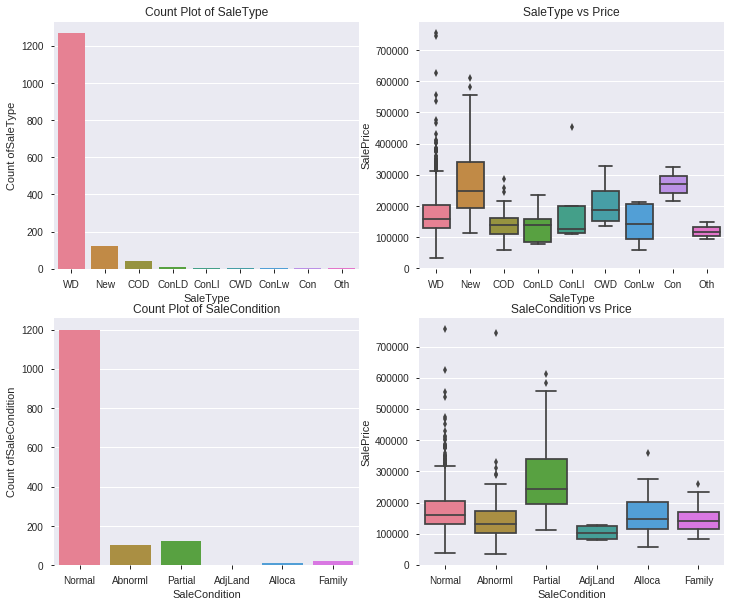

In [28]:
plot_charts('SaleType', 'SaleCondition',label_rotation=False)

In [29]:
# DATA PREPARATION

In [30]:
#changing months to categorical
import calendar

housing['MonthSold'] = housing['MoSold'].apply(lambda x: calendar.month_name[x])
housing=housing.drop(['MoSold'], axis=1)

In [31]:
#changing data type of Gararge yr built to int from float
housing['GarageYrBlt'] = housing['GarageYrBlt'].astype(int)

In [32]:
#DERIVED VARIABLES which might make more sense than year

housing['Age'] = housing['YrSold'] - housing['YearBuilt']
housing['Remod_Age'] = housing['YrSold'] - housing['YearRemodAdd']
housing['Garage_Age'] = housing['YrSold'] - housing['GarageYrBlt']
housing.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],1, inplace = True)

In [33]:
numeric_data = housing.select_dtypes(include = ['float64','int64'])
numeric_data.columns

Index(['Id', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscVal', 'SalePrice', 'Age', 'Remod_Age', 'Garage_Age'],
      dtype='object')

In [34]:
#OUTLIER TREATMENT

def remove_outliers(dtf, numl_list):
    for j in numl_list:
        Q1 = dtf[j].quantile(0.05)
        Q3 = dtf[j].quantile(0.95)
        IQR = Q3 - Q1       
        dtf = dtf[(dtf[j] >= Q1-2.5*IQR) & (dtf[j] <= Q3+2.5*IQR)]
    return dtf

In [35]:
numeric_data_list=list(numeric_data.columns)

In [36]:
housing=remove_outliers(housing,numeric_data_list)

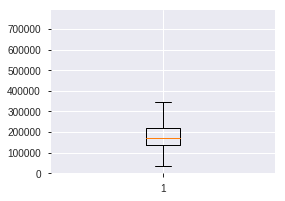

In [37]:
# Outlier treatment on the variable Sale Price
plt.figure(figsize=(4,3))
plt.boxplot(housing['SalePrice'])
plt.show()

In [38]:
housing.shape

(1158, 80)

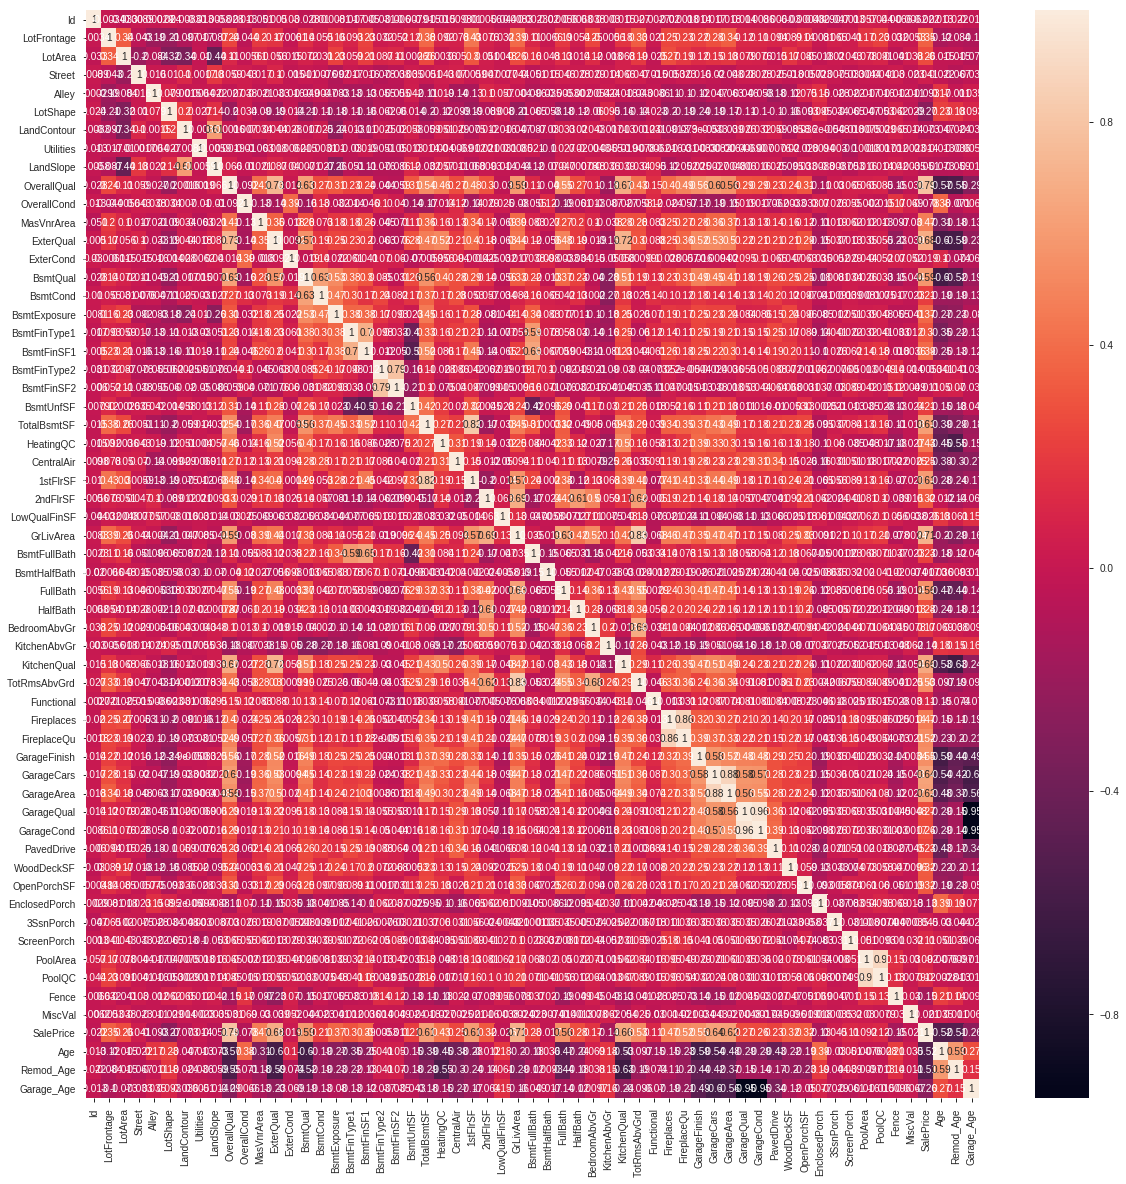

In [39]:
cor = numeric_data.corr()
plt.figure(figsize=(20,20))

sns.heatmap(cor, annot=True)
plt.show()

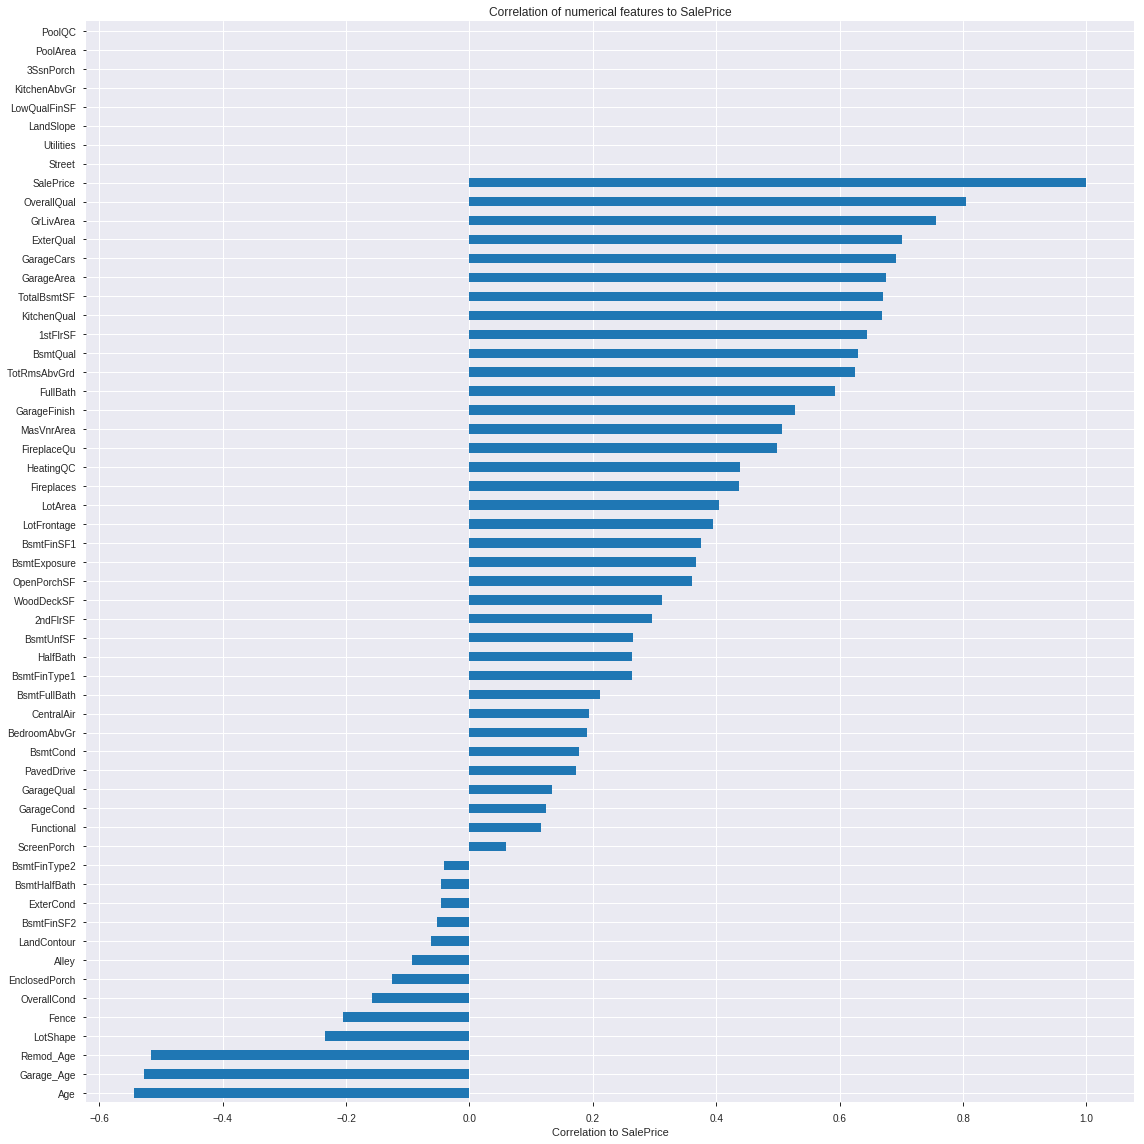

In [40]:
# we drop Id (not relevant)
corr = housing.drop(["Id"], axis=1).select_dtypes(include="number").corr()

plt.figure(figsize=(16,16));
corr["SalePrice"].sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Correlation of numerical features to SalePrice")
plt.xlabel("Correlation to SalePrice")
plt.tight_layout()
plt.show()

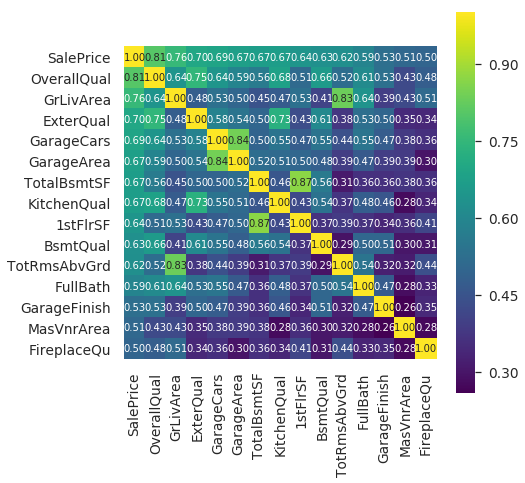

In [41]:
#saleprice correlation matrix
plt.figure(figsize=(7,7))
k = 15 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(housing[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, cmap='viridis',yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [42]:
#converting binary variables to numeric by mapping to 0 and 1

housing['Street'] = housing['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )
housing['CentralAir'] = housing['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)

In [43]:
#converting binary variables to numeric by mapping to 0 and 1

housing['PavedDrive'] = housing['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0)

In [44]:
df = housing.drop(['Id'],axis=1)
housing_categorical = df.select_dtypes(include=['object'])
housing_categorical.head()

,MSSubClass,MSZoning,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,...,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,GarageType,MiscFeature,SaleType,SaleCondition,MonthSold
0,2-STORY 1946 & NEWER,RL,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,...,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,None,WD,Normal,February
1,1-STORY 1946 & NEWER ALL STYLES,RL,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,...,MetalSd,None,CBlock,GasA,SBrkr,Attchd,None,WD,Normal,May
2,2-STORY 1946 & NEWER,RL,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,...,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,None,WD,Normal,September
3,2-STORY 1945 & OLDER,RL,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,...,Wd Shng,None,BrkTil,GasA,SBrkr,Detchd,None,WD,Abnorml,February
4,2-STORY 1946 & NEWER,RL,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,...,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,None,WD,Normal,December


In [45]:
# convert into dummies
housing_dummies = pd.get_dummies(housing_categorical, drop_first=True)
housing_dummies.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,...,MonthSold_December,MonthSold_February,MonthSold_January,MonthSold_July,MonthSold_June,MonthSold_March,MonthSold_May,MonthSold_November,MonthSold_October,MonthSold_September
0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [46]:
#dropping original categorical columns
df = df.drop(list(housing_categorical.columns), axis=1)

In [47]:
#concatenating dummy columns to original dataframe
df = pd.concat([df,housing_dummies], axis=1)

In [48]:
df.shape

(1158, 208)

In [49]:
#train_test_split
df_train,df_test=train_test_split(df,train_size=0.70, random_state=100)
df_train.shape

(810, 208)

In [50]:
y_train = np.log(df_train.SalePrice)
X_train = df_train.drop("SalePrice",1)

y_test= np.log(df_test.SalePrice)
X_test = df_test.drop("SalePrice",1)

In [51]:
num_vars=X_train.select_dtypes(include=['int64','float64']).columns

In [52]:
num_vars

Index(['LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'Age',
       'Remod_Age', 'Garage_Age'],
      dtype='object')

In [53]:
scaler = StandardScaler()
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [54]:
#linear regression model

In [55]:
lm=LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,20)
rfe=rfe.fit(X_train,y_train)

col=X_train.columns[rfe.support_]
col

Index(['1stFlrSF', 'GrLivArea', 'Condition2_Norm', 'Condition2_PosN',
       'Condition2_RRNn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd',
       'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing',
       'Exterior2nd_CmentBd', 'Exterior2nd_Other', 'Exterior2nd_Stucco',
       'Exterior2nd_VinylSd'],
      dtype='object')

In [56]:
X_train_new=X_train[col]

X_train_new = sm.add_constant(X_train_new)

#create first model
lr=sm.OLS(y_train,X_train_new)

#fit the model
lr_model=lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     107.1
Date:                Mon, 30 Sep 2019   Prob (F-statistic):          6.33e-209
Time:                        16:06:48   Log-Likelihood:                 206.08
No. Observations:                 810   AIC:                            -370.2
Df Residuals:                     789   BIC:                            -271.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  11.8775      0.138     85.761      0.000      11.606      12.149
1stFlrSF                0.1141      0.008     13.839      0.000       0.098       0.130
GrLivArea               0.1950      0.008     23.946      0.000       0.179       0.211
Condition2_Norm        -0.1866      0.139     -1.345      0.179      -0.459       0.086
Condition2_PosN        -1.0223      0.198     -5.172      0.000      -1.410      -0.634
Condition2_RRNn        -0.2759      0.195     -1.416      0.157      -0.658       0.107
Exterior1st_BrkComm    -0.6397      0.200     -3.195      0.001      -1.033      -0.247
Exterior1st_BrkFace     0.3582      0.075      4.807      0.000       0.212       0.505
Exterior1st_HdBoard     0.3324      0.065      5.119      0.000       0.205       0.460
Exterior1st_ImStucc     0.5851      0.201      2.918      0.004       0.191       0.979
Exterior1st_MetalSd     0.3149      0.065      4.842      0.000       0.187       0.443
Exterior1st_Plywood     0.2945      0.068      4.338      0.000       0.161       0.428
Exterior1st_Stone      -0.2360      0.204     -1.158      0.247      -0.636       0.164
Exterior1st_Stucco      0.2716      0.103      2.624      0.009       0.068       0.475
Exterior1st_VinylSd     0.3516      0.092      3.824      0.000       0.171       0.532
Exterior1st_Wd Sdng     0.2155      0.065      3.315      0.001       0.088       0.343
Exterior1st_WdShing     0.2816      0.079      3.555      0.000       0.126       0.437
Exterior2nd_CmentBd     0.4188      0.071      5.886      0.000       0.279       0.558
Exterior2nd_Other       0.2857      0.202      1.411      0.159      -0.112       0.683
Exterior2nd_Stucco     -0.1431      0.098     -1.456      0.146      -0.336       0.050
Exterior2nd_VinylSd     0.1280      0.069      1.851      0.065      -0.008       0.264
==============================================================================
Omnibus:                      105.629   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              461.155
Skew:                          -0.519   Prob(JB):                    7.27e-101
Kurtosis:                       6.548   Cond. No.                         68.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
#RIDGE REGULARIZATION

# list of alphas to tune


params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    1.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [58]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 8.0}
-0.07821432291621234


In [59]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007746,0.005090,0.001407,0.000101,0.0001,{'alpha': 0.0001},-0.083082,-0.084671,-0.082638,-0.086941,...,-0.082924,0.003196,26,-0.056341,-0.053264,-0.050548,-0.054868,-0.052142,-0.053433,0.002026
1,0.005066,0.000054,0.001349,0.000027,0.001,{'alpha': 0.001},-0.082932,-0.084566,-0.082580,-0.086951,...,-0.082861,0.003190,25,-0.056354,-0.053282,-0.050557,-0.054872,-0.052173,-0.053448,0.002024
2,0.004992,0.000081,0.001379,0.000011,0.01,{'alpha': 0.01},-0.081780,-0.083794,-0.082097,-0.087048,...,-0.082419,0.003138,24,-0.056467,-0.053433,-0.050644,-0.054920,-0.052401,-0.053573,0.002008
3,0.005606,0.000508,0.001434,0.000112,0.05,{'alpha': 0.05},-0.079796,-0.082146,-0.081071,-0.087485,...,-0.081625,0.003294,23,-0.056796,-0.053981,-0.050976,-0.055150,-0.052973,-0.053975,0.001967
4,0.006258,0.000808,0.001602,0.000150,0.1,{'alpha': 0.1},-0.079016,-0.081054,-0.080554,-0.087861,...,-0.081257,0.003496,21,-0.057102,-0.054591,-0.051369,-0.055403,-0.053561,-0.054405,0.001910
5,0.005898,0.000333,0.001534,0.000115,0.2,{'alpha': 0.2},-0.078675,-0.079782,-0.079939,-0.088333,...,-0.080973,0.003741,20,-0.057579,-0.055486,-0.051936,-0.055848,-0.054485,-0.055067,0.001857
6,0.005524,0.000104,0.001455,0.000088,0.3,{'alpha': 0.3},-0.078473,-0.079021,-0.079532,-0.088652,...,-0.080755,0.003979,19,-0.058003,-0.056142,-0.052470,-0.056242,-0.055270,-0.055625,0.001810
7,0.006337,0.000208,0.001808,0.000112,0.4,{'alpha': 0.4},-0.078246,-0.078924,-0.079302,-0.088850,...,-0.080642,0.004133,18,-0.058470,-0.056652,-0.052946,-0.056554,-0.056047,-0.056134,0.001793
8,0.005767,0.000198,0.001535,0.000102,0.5,{'alpha': 0.5},-0.078078,-0.078849,-0.079167,-0.088973,...,-0.080531,0.004258,17,-0.058890,-0.057071,-0.053346,-0.056814,-0.056712,-0.056567,0.001795
9,0.006272,0.000221,0.001647,0.000084,0.6,{'alpha': 0.6},-0.078003,-0.078784,-0.079082,-0.089046,...,-0.080435,0.004352,16,-0.059246,-0.057423,-0.053683,-0.057044,-0.057292,-0.056938,0.001805


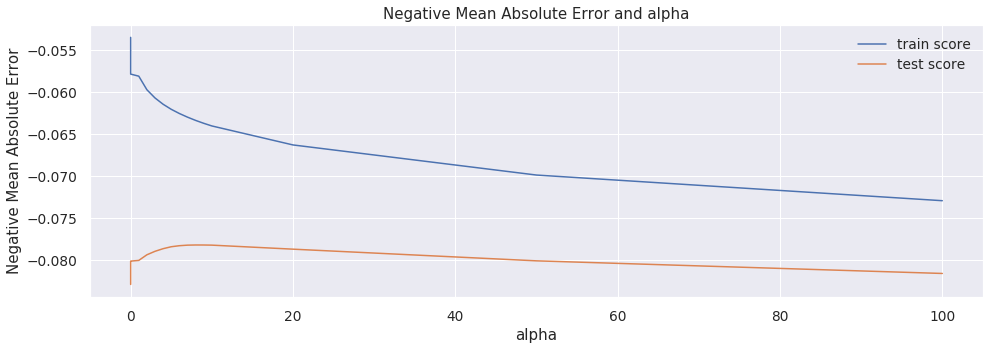

In [60]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [61]:
#final ridge model
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.01063325,  0.00990019,  0.        ,  0.00791132, -0.00517561,
        0.00050409,  0.        ,  0.        ,  0.06568034,  0.04047488,
        0.00820901,  0.00122686, -0.01021278,  0.00843332, -0.00216511,
        0.00843028,  0.01248294,  0.02219458, -0.00036358,  0.00497123,
        0.00010802,  0.02560259,  0.01268519,  0.        ,  0.02925795,
        0.02128191,  0.        ,  0.04134956,  0.01162143,  0.00519703,
        0.01872284,  0.01566863,  0.00802412,  0.        ,  0.01209221,
        0.02353173,  0.01097888,  0.01609067,  0.0001727 ,  0.00535028,
        0.01566092,  0.0243547 ,  0.01559595, -0.00947382,  0.        ,
        0.01348962,  0.0084073 ,  0.00668372,  0.        ,  0.01476749,
        0.        ,  0.        , -0.0007125 ,  0.        , -0.05541783,
       -0.01100369,  0.00721493,  0.01953277, -0.02109012,  0.0117894 ,
        0.00020137,  0.00756804, -0.00627329,  0.0063129 ,  0.02484082,
        0.01129821, -0.04075652, -0.00970909, -0.01037337,  0.01

In [62]:
#lets predict the R-squared value of test and train data
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9283780163509405


In [63]:
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9143629298942629


In [64]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_test_pred))

RMSE is: 
 0.01440684310337499


In [65]:
# Ridge model parameters
model_parameters_1 = list(ridge.coef_)
model_parameters_1.insert(0, ridge.intercept_)
model_parameters_1 = [round(x, 3) for x in model_parameters_1]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters_1))

[('constant', 11.885),
 ('LotFrontage', 0.011),
 ('LotArea', 0.01),
 ('Street', 0.0),
 ('Alley', 0.008),
 ('LotShape', -0.005),
 ('LandContour', 0.001),
 ('Utilities', 0.0),
 ('LandSlope', 0.0),
 ('OverallQual', 0.066),
 ('OverallCond', 0.04),
 ('MasVnrArea', 0.008),
 ('ExterQual', 0.001),
 ('ExterCond', -0.01),
 ('BsmtQual', 0.008),
 ('BsmtCond', -0.002),
 ('BsmtExposure', 0.008),
 ('BsmtFinType1', 0.012),
 ('BsmtFinSF1', 0.022),
 ('BsmtFinType2', -0.0),
 ('BsmtFinSF2', 0.005),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.026),
 ('HeatingQC', 0.013),
 ('CentralAir', 0.0),
 ('1stFlrSF', 0.029),
 ('2ndFlrSF', 0.021),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.041),
 ('BsmtFullBath', 0.012),
 ('BsmtHalfBath', 0.005),
 ('FullBath', 0.019),
 ('HalfBath', 0.016),
 ('BedroomAbvGr', 0.008),
 ('KitchenAbvGr', 0.0),
 ('KitchenQual', 0.012),
 ('TotRmsAbvGrd', 0.024),
 ('Functional', 0.011),
 ('Fireplaces', 0.016),
 ('FireplaceQu', 0.0),
 ('GarageFinish', 0.005),
 ('GarageCars', 0.016),
 ('GarageArea', 

In [66]:
#lasso
params = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01]}
lasso = Lasso()

# cross validation
model_cv_l = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_l.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [67]:
# cv results
cv_results_l = pd.DataFrame(model_cv_l.cv_results_)

In [68]:
#checking the value of optimum number of parameters
print(model_cv_l.best_params_)
print(model_cv_l.best_score_)

{'alpha': 0.001}
-0.07830085346662836


In [69]:
#final lasso model
alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [70]:
#lets predict the R-squared value of test and train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9227862283066279


In [71]:
#lets predict the R-squared value of test and train data
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9197730237610156


In [72]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_test_pred))

RMSE is: 
 0.013496695507052504


In [73]:
# Lasso model parameters
model_parameters_1 = list(lasso.coef_)
model_parameters_1.insert(0, lasso.intercept_)
model_parameters_1 = [round(x, 3) for x in model_parameters_1]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters_1))

[('constant', 11.965),
 ('LotFrontage', 0.014),
 ('LotArea', 0.014),
 ('Street', 0.0),
 ('Alley', 0.009),
 ('LotShape', -0.004),
 ('LandContour', -0.0),
 ('Utilities', 0.0),
 ('LandSlope', 0.0),
 ('OverallQual', 0.074),
 ('OverallCond', 0.042),
 ('MasVnrArea', 0.008),
 ('ExterQual', 0.002),
 ('ExterCond', -0.009),
 ('BsmtQual', 0.003),
 ('BsmtCond', -0.0),
 ('BsmtExposure', 0.006),
 ('BsmtFinType1', 0.009),
 ('BsmtFinSF1', 0.023),
 ('BsmtFinType2', 0.0),
 ('BsmtFinSF2', 0.005),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.029),
 ('HeatingQC', 0.015),
 ('CentralAir', 0.0),
 ('1stFlrSF', 0.01),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.079),
 ('BsmtFullBath', 0.013),
 ('BsmtHalfBath', 0.004),
 ('FullBath', 0.011),
 ('HalfBath', 0.009),
 ('BedroomAbvGr', 0.007),
 ('KitchenAbvGr', 0.0),
 ('KitchenQual', 0.012),
 ('TotRmsAbvGrd', 0.02),
 ('Functional', 0.01),
 ('Fireplaces', 0.016),
 ('FireplaceQu', 0.0),
 ('GarageFinish', 0.007),
 ('GarageCars', 0.014),
 ('GarageArea', 0.022

In [74]:
test_data=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [75]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [76]:
df_missing=pd.DataFrame((round(100*(test_data.isnull().sum()/len(test_data.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

,missing
PoolQC,99.79
MiscFeature,96.50
Alley,92.67
Fence,80.12
FireplaceQu,50.03
LotFrontage,15.56
GarageYrBlt,5.35
GarageQual,5.35
GarageFinish,5.35
GarageCond,5.35


In [77]:
#addressing NaN values based on data dictionary

# In column 'PoolQC' (Pool quality), NaN stands for No Pool
test_data['PoolQC'] = test_data['PoolQC'].fillna('No_Pool')

# In column 'MiscFeature' (Miscellaneous Features), NaN stands for None, meaning the house has no miscellaneous features.
test_data['MiscFeature'] = test_data['MiscFeature'].fillna('None')

# In column 'Alley', NaN stands for No Alley Access as per the data dictionary
test_data['Alley'] = test_data['Alley'].fillna('No_Alley_Access')

# In column 'Fence' (Fence Quality), NaN stands for No Fence as per the data dictionary
test_data['Fence'] = test_data['Fence'].fillna('No_Fence')

# In column 'FireplaceQu' (FireplaceQu Quality), NaN stands for No Fireplace as per the data dictionary
test_data['FireplaceQu'] = test_data['FireplaceQu'].fillna('No_Fireplace')

# LotFrontage stands for Linear feet of street connected to property, there is no explanation to impute this in data dictionary
# Let's consider imputing it with median of the lotFrontage of houses in the same neighbourhood

# Group data by neighborhood and impute missing value with median LotFrontage of all the neighborhood
test_data["LotFrontage"] = test_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

# In column 'GarageYrBlt' (Gargae Year Built), NaN stands for houses with no garage, let's impute with 0
test_data['GarageYrBlt'] = test_data['GarageYrBlt'].fillna(0)

# 'GarageType', 'GarageFinish', 'GarageQual' (Garage Quality) and 'GarageCond'(Garage Condition)
# Missing values signify no garage as per data dictionary.let's impute NaN values here with No Garage
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    test_data[col] = test_data[col].fillna('No_Garage')

#BsmtFinType1, BsmtFinType2 (Rating of basement finished area),
#BsmtExposure (Basement Exposure), BsmtQual(Basement Quality), BsmtCond (Basement Conidtion)
#These are all parameter related to basement. A NaN value probably signifies that the house does not have a basement.
for col in ('BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond'):
    test_data[col] = test_data[col].fillna('No_Basement')
    
# In column 'MasVnrType' (Masonry veneer type), let's impute it with mode "None"
test_data['MasVnrType'] = test_data['MasVnrType'].fillna('None')

# In column 'MasVnrType' (Masonry veneer type), let's impute it with mode 0 corresponding to None
test_data['MasVnrArea'] = test_data['MasVnrArea'].fillna(0)

# In column 'Electrical' (Electrical system), let's impute NaN with "Other"
test_data['Electrical'] = test_data['Electrical'].fillna("Other")

In [78]:
df_missing=pd.DataFrame((round(100*(test_data.isnull().sum()/len(test_data.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

,missing
MSZoning,0.27
BsmtFullBath,0.14
BsmtHalfBath,0.14
Functional,0.14
Utilities,0.14
Exterior2nd,0.07
BsmtFinSF2,0.07
GarageArea,0.07
BsmtFinSF1,0.07
GarageCars,0.07


In [79]:
catgl_feats = test_data.dtypes[test_data.dtypes == 'object'].index
numrl_feats = test_data.dtypes[test_data.dtypes != 'object'].index

In [80]:
Nan_cols = []

cols = test_data.columns
for i in cols:
    if (test_data[i].isnull().sum()/len(df))*100 > 0:
        Nan_cols.append(i)

In [81]:
cat_treat_list = []
num_treat_list = []

for i in Nan_cols:
    if i in catgl_feats:
        cat_treat_list.append(i)
    else:
        num_treat_list.append(i)

In [82]:
cat_treat_list

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'KitchenQual',
 'Functional',
 'SaleType']

In [83]:
num_treat_list

['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageCars',
 'GarageArea']

In [84]:
for i in cat_treat_list:
    test_data[i].fillna(test_data[i].mode()[0], inplace = True)

In [85]:
for i in num_treat_list:
    test_data[i].fillna(0, inplace = True)

In [86]:
df_missing=pd.DataFrame((round(100*(test_data.isnull().sum()/len(test_data.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

,missing
Id,0.0
MSSubClass,0.0
GarageType,0.0
FireplaceQu,0.0
Fireplaces,0.0
Functional,0.0
TotRmsAbvGrd,0.0
KitchenQual,0.0
KitchenAbvGr,0.0
BedroomAbvGr,0.0


In [87]:
# label encode ordinal features where there is order in categories

test_data = test_data.replace({  "Alley":        {"No_Alley_Access" : 0, "Grvl" : 1, "Pave" : 2},
                       "BsmtCond":     {"No_Basement" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "BsmtExposure": {"No_Basement" : 0, "No" : 2, "Mn" : 2, "Av": 3, 
                                        "Gd" : 4},
                       "BsmtFinType1": {"No_Basement" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, 
                                        "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2": {"No_Basement" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, 
                                        "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual":     {"No_Basement" : 0, "Po" : 1, "Fa" : 2, "TA": 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "CentralAir":   {"None" : 0, "N" : 1, "Y" : 2},
                       "ExterCond":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, 
                                        "Gd": 4, "Ex" : 5},
                       "ExterQual":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, 
                                        "Gd": 4, "Ex" : 5},
                       "Fence":        {"No_Fence" : 0, "MnWw" : 1, "GdWo" : 2, "MnPrv": 3, 
                                        "GdPrv" : 4},
                       "FireplaceQu":  {"No_Fireplace" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "Functional":   {"None" : 0, "Sal" : 1, "Sev" : 2, "Maj2" : 3, 
                                        "Maj1" : 4, "Mod": 5, "Min2" : 6, "Min1" : 7, 
                                        "Typ" : 8},
                       "GarageCond":   {"No_Garage" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "GarageQual":   {"No_Garage" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "GarageFinish": {"No_Garage" : 0, "Unf" : 1, "RFn" : 2, "Fin" : 3},
                       "HeatingQC":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "KitchenQual":  {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "LandContour":  {"None" : 0, "Low" : 1, "HLS" : 2, "Bnk" : 3, 
                                        "Lvl" : 4},
                       "LandSlope":    {"None" : 0, "Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape":     {"None" : 0, "IR3" : 1, "IR2" : 2, "IR1" : 3, 
                                        "Reg" : 4},
                       "PavedDrive":   {"None" : 0, "N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC":       {"No_Pool" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, 
                                        "Ex" : 4},
                       "Street":       {"None" : 0, "Grvl" : 1, "Pave" : 2},
                       "Utilities":    {"None" : 0, "ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, 
                                        "AllPub" : 4}}
                     )

test_data.BsmtCond = test_data.BsmtCond.astype(int)

In [88]:
test_data.GarageQual = test_data.GarageQual.astype(int)

In [89]:
## "MSSubClass" is a numeric column but it should actually be categorical as per the data dictionary, so let's convert that.

test_data=test_data.replace({'MSSubClass' : { 20 : '1-STORY 1946 & NEWER ALL STYLES', 
                                          30:'1-STORY 1945 & OLDER',
                                          40:'1-STORY W/FINISHED ATTIC ALL AGES',
                                          45:'1-1/2 STORY - UNFINISHED ALL AGES',
                                          50:'1-1/2 STORY FINISHED ALL AGES',
                                          60:'2-STORY 1946 & NEWER',
                                          70:'2-STORY 1945 & OLDER',
                                          75:'2-1/2 STORY ALL AGES',
                                          80:'SPLIT OR MULTI-LEVEL',
                                          85:'SPLIT FOYER',
                                          90:'DUPLEX - ALL STYLES AND AGES',
                                         120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
                                         150:'1-1/2 STORY PUD - ALL AGES',
                                         160:'2-STORY PUD - 1946 & NEWER',
                                         180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
                                         190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'}})

In [90]:
#changing months to categorical
import calendar

test_data['MonthSold'] = test_data['MoSold'].apply(lambda x: calendar.month_name[x])
test_data=test_data.drop(['MoSold'], axis=1)

In [91]:
#changing data type of Gararge yr built to int from float
test_data['GarageYrBlt'] = test_data['GarageYrBlt'].astype(int)

In [92]:
#DERIVED VARIABLES which might make more sense than year

test_data['Age'] = test_data['YrSold'] - test_data['YearBuilt']
test_data['Remod_Age'] = test_data['YrSold'] - test_data['YearRemodAdd']
test_data['Garage_Age'] = test_data['YrSold'] - test_data['GarageYrBlt']
test_data.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],1, inplace = True)

In [93]:
#converting binary variables to numeric by mapping to 0 and 1

test_data['Street'] = test_data['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )
test_data['CentralAir'] = test_data['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)

In [94]:
#converting binary variables to numeric by mapping to 0 and 1

test_data['PavedDrive'] = test_data['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0)

In [95]:
test_data_X=test_data.drop('Id',1)

In [96]:
test_data_numerical=test_data_X.select_dtypes(include=['int32','int64','float64']).columns

In [97]:
test_data_numerical

Index(['LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'Age',
       'Remod_Age', 'Garage_Age'],
      dtype='object')

In [98]:
test_data_categorical = test_data_X.select_dtypes(include=['object'])
test_data_categorical.head()

,MSSubClass,MSZoning,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,...,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,GarageType,MiscFeature,SaleType,SaleCondition,MonthSold
0,1-STORY 1946 & NEWER ALL STYLES,RH,Inside,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,...,VinylSd,None,CBlock,GasA,SBrkr,Attchd,None,WD,Normal,June
1,1-STORY 1946 & NEWER ALL STYLES,RL,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,...,Wd Sdng,BrkFace,CBlock,GasA,SBrkr,Attchd,Gar2,WD,Normal,June
2,2-STORY 1946 & NEWER,RL,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,...,VinylSd,None,PConc,GasA,SBrkr,Attchd,None,WD,Normal,March
3,2-STORY 1946 & NEWER,RL,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,...,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,None,WD,Normal,June
4,1-STORY PUD (Planned Unit Development) - 1946 ...,RL,Inside,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,...,HdBoard,None,PConc,GasA,SBrkr,Attchd,None,WD,Normal,January


In [99]:
# convert into dummies
test_data_dummies = pd.get_dummies(test_data_categorical, drop_first=True)
test_data_dummies.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-1/2 STORY PUD - ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,...,MonthSold_December,MonthSold_February,MonthSold_January,MonthSold_July,MonthSold_June,MonthSold_March,MonthSold_May,MonthSold_November,MonthSold_October,MonthSold_September
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [100]:
#dropping original categorical columns
df_test = test_data_X.drop(list(test_data_categorical.columns), axis=1)

In [101]:
#concatenating dummy columns to original dataframe
df = pd.concat([df_test,test_data_dummies], axis=1)

In [102]:
df[test_data_numerical].shape

(1459, 57)

In [103]:
df[test_data_numerical] = scaler.transform(df[test_data_numerical])

In [104]:
#lets predict the R-squared value of test and train data
y_test_predicted = lasso.predict(df)

In [105]:
y_test_predicted

array([11.45817063, 11.58770631, 11.60551381, ..., 11.74924078,
       11.26796194, 11.87808761])

In [106]:
final_predictions = np.exp(y_test_predicted)

In [107]:
final_predictions

array([ 94671.72184846, 107764.79563373, 109701.0048046 , ...,
       126657.36230186,  78273.30892569, 144074.75971237])

In [108]:
salespriceprediction= pd.DataFrame({'Id': test_data['Id'] ,'SalePrice': final_predictions })

In [109]:
salespriceprediction.to_csv("salespriceprediction.csv",index=False)